# Data Exploration

1. [The Tasks](#tt) <br>
2. [Loading our Data and Libraries](#ld) <br>
3. [Class Distribution](#cd) <br>
4. [Baseline Accuracy](#ba) <br>
5. [Plotting Images](#pi) <br>
6. [PCA Scree Plot (OverFeat Features)](#sp) <br>
7. [PCA 2D Plot (OverFeat Features)](#2d) <br>
8. [PCA 2D Plot Image Pixels Matrix](#2dimg) <br>

***

## The Tasks
<a id="tt" > 

We perform the following tasks:

- Print the class distribution.  
- Give the accuracy of the "most-frequent" baseline.
- Plot a few images from the data set.
- Using the high-level OverFeat features
- Create a scree plot as described.
- Give the cumulated PVE of the first two principal components.
- Compute the number of components to retain 80%, 90%, 95% and 99% of the cumulated PVE.
- Create a 2d plot of the data as described. Write your observations. 
- Using the matrix of pixels, create a 2d plot of the data and write your observations.

***

## Loading our Data and Libraries
<a id="ld" > 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
sns.set()
%matplotlib inline

In [2]:
with np.load('cifar4-train.npz', allow_pickle=False) as npz_file:
    cifar4 = dict(npz_file.items())
print('Our data countains {}'.format(cifar4.keys()))

Our data countains dict_keys(['pixels', 'overfeat', 'labels', 'names', 'allow_pickle'])


In [3]:
X_pix = cifar4['pixels']
X_of = cifar4['overfeat']
y = cifar4['labels']
names = cifar4['names']


print('Shape and datatype of X:', X_pix.shape, X_pix.dtype)
print('Shape and datatype of y:', y.shape, y.dtype)
print ('Shape of X OverFeat:', X_of.shape)
print('names:', names)

Shape and datatype of X: (5000, 3072) uint8
Shape and datatype of y: (5000,) int64
Shape of X OverFeat: (5000, 4096)
names: ['truck' 'car' 'airplane' 'ship']


***

## Class Distribution
<a id="cd" > 

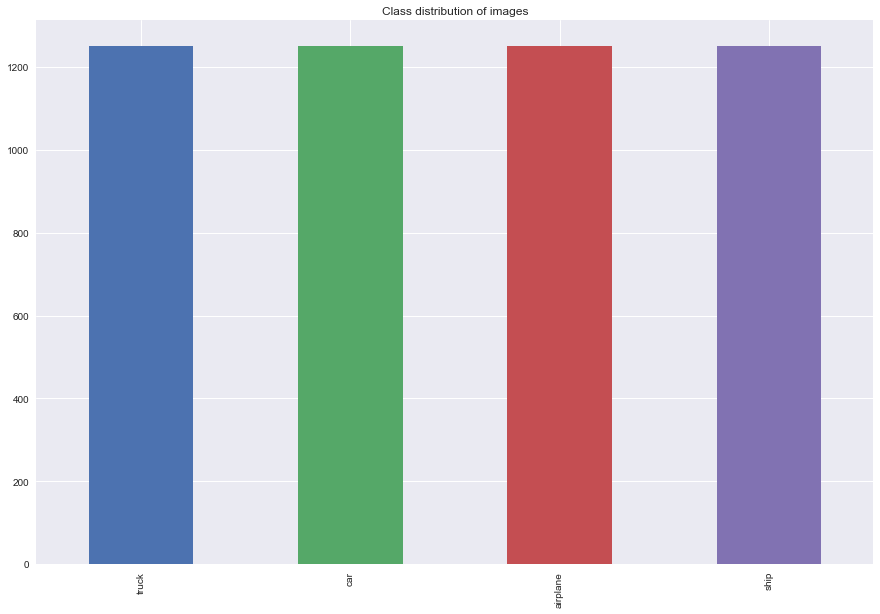

In [4]:
fig = plt.figure(figsize=(15,10))
pd.value_counts(cifar4['labels']).plot(kind='bar')
plt.xticks(np.arange(len(names)), names)
plt.title('Class distribution of images')
plt.show()

All classes seem to be  equally represented in our dataset.

***

## Baseline Accuracy
<a id="ba" > 

In [5]:
# Splitting our data into a train- and test set
X_tr, X_te, y_tr, y_te = train_test_split(X_pix, y, test_size=500, random_state=0)

# Getting a baseline
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_tr, y_tr)
baseline = dummy.score(X_te, y_te)
print ('Baseline Accuracy {:.3f}'.format(baseline))

Baseline Accuracy 0.222


Our baseline accuracy is about what you would expect, given the class frequencies

***

## Plotting Images 
<a id="pi" > 

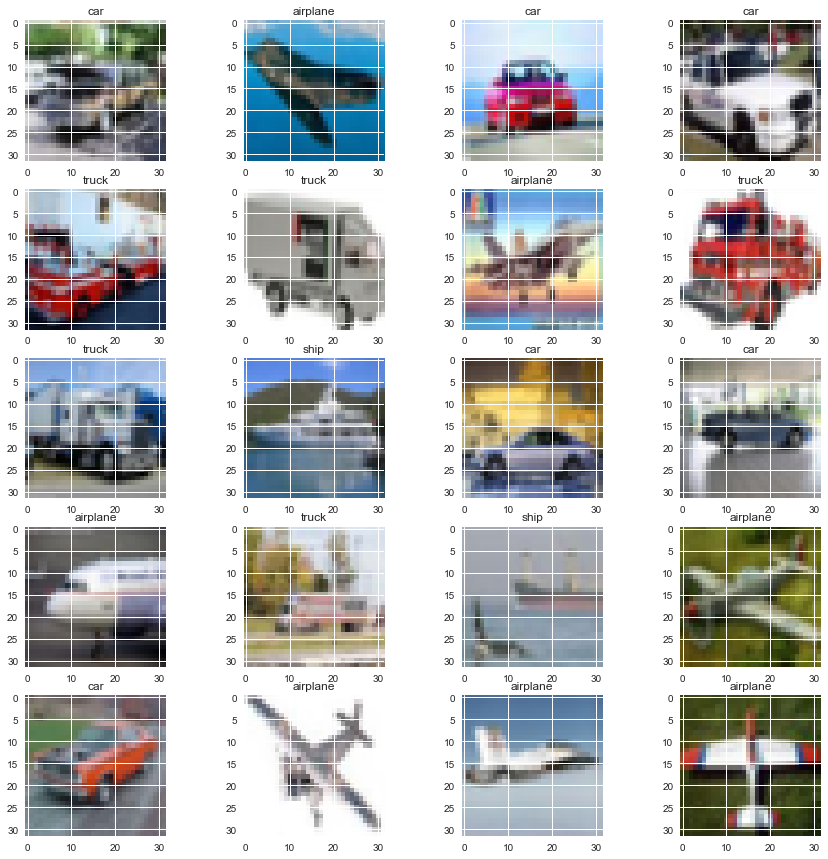

In [6]:
fig = plt.figure(figsize=(15, 15))
columns = 4
rows = 5
for i in range(1, columns*rows + 1):
    flat_img = X_pix[i]
    img = flat_img.reshape(32, 32, 3)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title(names[y[i]])
plt.show()

***

## PCA Scree Plot (OverFeat Features)
<a id="sp" > 

In [7]:
pca = PCA(n_components=None)
pca.fit(X_of)
print ('The cumulated PVE in the first 2 components is {:.3f}'.format(pca.explained_variance_ratio_[0:2].sum()))

The cumulated PVE in the first 2 components is 0.250


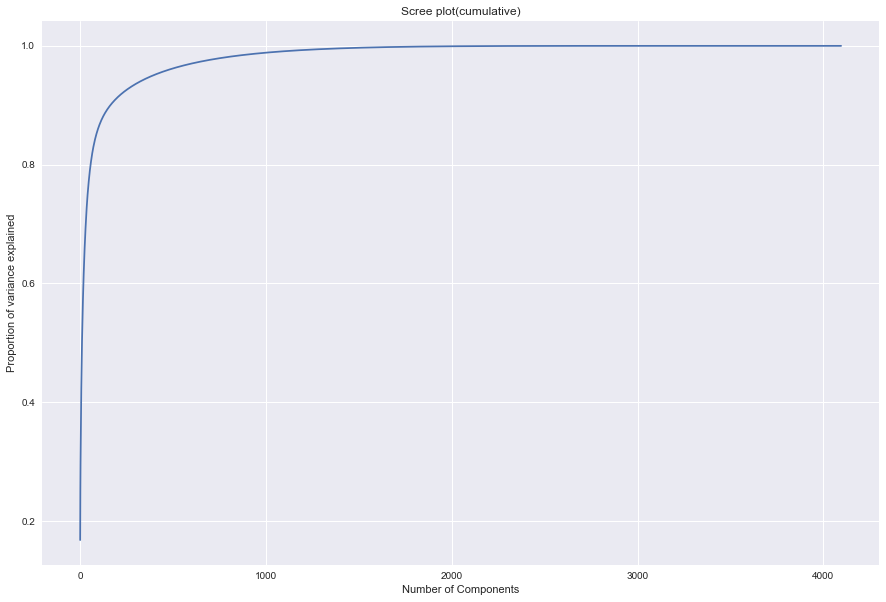

In [8]:
# Creating a scree plot
pve = pca.explained_variance_ratio_
fig = plt.figure(figsize=(15, 10))
plt.plot(np.cumsum(pve))
plt.xlabel('Number of Components')
plt.ylabel('Proportion of variance explained')
plt.title('Scree plot(cumulative)')
plt.show()

1000 components seem to be enough to explain almost all of the variance in our data.

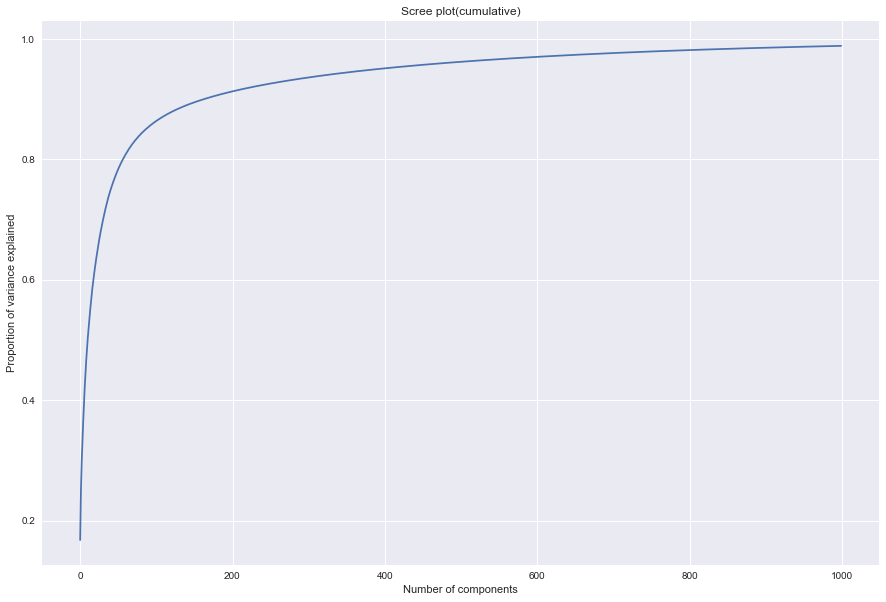

In [9]:
pve = pca.explained_variance_ratio_
fig = plt.figure(figsize=(15, 10))
plt.plot(np.cumsum(pve[0:1000]))
plt.xlabel('Number of components')
plt.ylabel('Proportion of variance explained')
plt.title('Scree plot(cumulative)')
plt.show()

In [10]:
pve_cumsum = np.cumsum(pve)
df_pve = pd.DataFrame.from_items([('cumulated', pve_cumsum)]).round(3)
df_pve['cumulated'].head()

0    0.168
1    0.250
2    0.297
3    0.334
4    0.365
Name: cumulated, dtype: float32

In [11]:
print('We need {} Components to explain 80% of the variance'.format(df_pve[df_pve['cumulated'] == 0.80].head(1).index.get_values()))
print('We need {} Components to explain 90% of the variance'.format(df_pve[df_pve['cumulated'] == 0.90].head(1).index.get_values()))
print('We need {} Components to explain 95% of the variance'.format(df_pve[df_pve['cumulated'] == 0.95].head(1).index.get_values()))
print('We need {} Components to explain 99% of the variance'.format(df_pve[df_pve['cumulated'] == 0.99].head(1).index.get_values()))

We need [56] Components to explain 80% of the variance
We need [162] Components to explain 90% of the variance
We need [387] Components to explain 95% of the variance
We need [1037] Components to explain 99% of the variance


***

## PCA 2D Plot OverFeat Features
<a id="2d" > 

In [12]:
# Reducing our features to two components using PCA
pca = PCA(n_components = 2)
pca.fit(X_of)
X_of_2d = pca.transform(X_of)

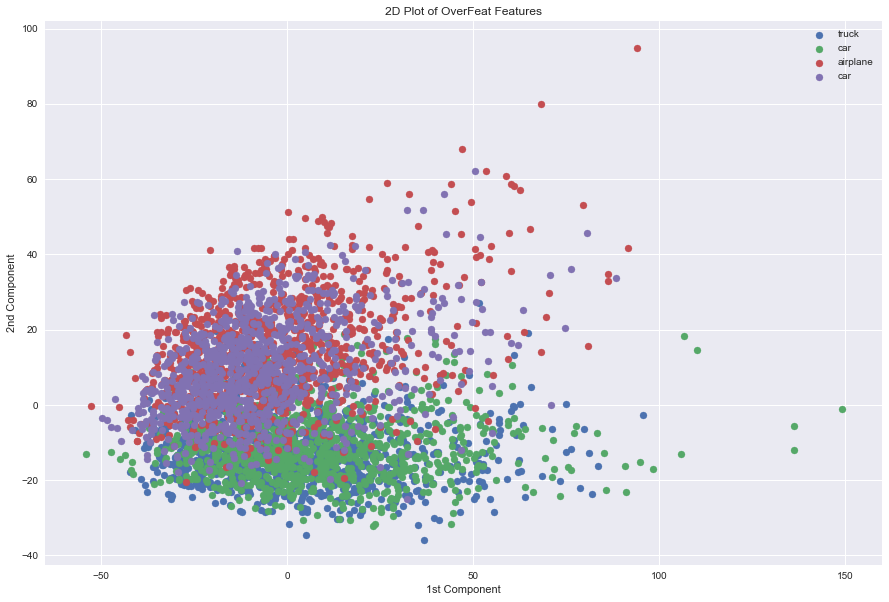

In [13]:
fig = plt.figure(figsize=(15, 10))

for i in range(len(names)):
    idx = (y == i)
    plot_0 = X_of_2d[idx, 0]
    plot_1 = X_of_2d[idx, 1]
    plt.scatter(plot_0[:1000], plot_1[:1000], label = names[y[i]])
    
plt.legend()
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.title('2D Plot of OverFeat Features')
plt.show()

We can see some separation however, it looks more like there are two clusters instead of four.

***

## PCA 2D Plot Image Pixels Matrix
<a id="2dimg" > 

In [14]:
# Matrix of Image pixels
pca_pix = PCA(n_components=2)
pca_pix.fit(X_pix)
X_2d = pca_pix.transform(X_pix)

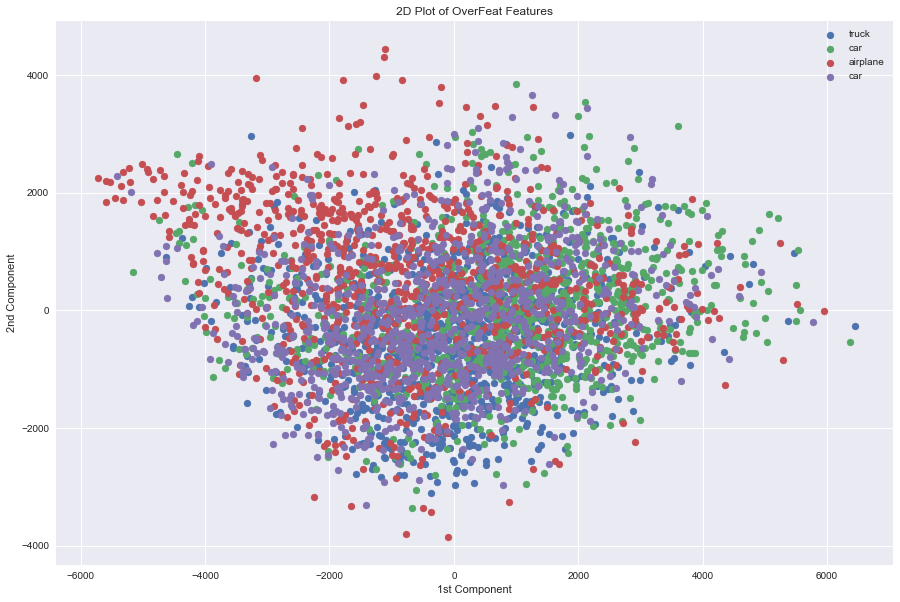

In [15]:
fig = plt.figure(figsize=(15, 10))

for i in range(len(names)):
    idx = (y == i)
    plot_0 = X_2d[idx, 0]
    plot_1 = X_2d[idx, 1]
    plt.scatter(plot_0[:1000], plot_1[:1000], label = names[y[i]])
    
plt.legend()
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.title('2D Plot of OverFeat Features')
plt.show()

It is noticeably harder to identify clusters and relationships compared to the overfeat' set